In [1]:
from matplotlib import pyplot as plt
from spacepy import pycdf
import numpy as np

In [2]:
h1_wav_filename = 'wi_h1_wav_20020320_v01.cdf'
h0_wav_filename = 'wi_h0_wav_20020320_v02.cdf'
k0_wav_filename = 'wi_k0_wav_20020320_v02.cdf'
date = h1_wav_filename[10:18]
print(date)

20020320


In [3]:
h1_data = pycdf.CDF(h1_wav_filename)
# h1_data

(1440, 96)
[datetime.timedelta(0, 60) datetime.timedelta(0, 60)
 datetime.timedelta(0, 60) datetime.timedelta(0, 60)
 datetime.timedelta(0, 60) datetime.timedelta(0, 60)
 datetime.timedelta(0, 60) datetime.timedelta(0, 60)
 datetime.timedelta(0, 60) datetime.timedelta(0, 60)]


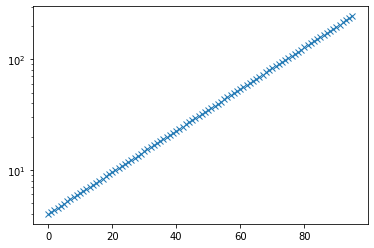

In [4]:
h1_freq_TNR = h1_data['Frequency_TNR'][...]
h1_epoch = h1_data['Epoch'][...]
plt.semilogy(h1_freq_TNR,'x') # frequency bins are log-spaced
h1_min_volt_TNR = h1_data['Minimum_voltage_TNR'][...]
h1_volt_TNR = h1_data['E_VOLTAGE_TNR'][...]
print(h1_volt_TNR.shape)
print(np.diff(h1_epoch)[:10]);

In [5]:
h1_freq_TNR

array([  4.   ,   4.177,   4.362,   4.555,   4.757,   4.967,   5.187,
         5.417,   5.657,   5.907,   6.169,   6.442,   6.727,   7.025,
         7.336,   7.661,   8.   ,   8.354,   8.724,   9.11 ,   9.514,
         9.935,  10.375,  10.834,  11.314,  11.815,  12.338,  12.884,
        13.454,  14.05 ,  14.672,  15.322,  16.   ,  16.708,  17.448,
        18.221,  19.027,  19.87 ,  20.749,  21.668,  22.627,  23.629,
        24.675,  25.768,  26.909,  28.1  ,  29.344,  30.643,  32.   ,
        33.417,  34.896,  36.441,  38.055,  39.739,  41.499,  43.336,
        45.255,  47.258,  49.351,  51.536,  53.817,  56.2  ,  58.688,
        61.287,  64.   ,  66.833,  69.792,  72.882,  76.109,  79.479,
        82.998,  86.672,  90.51 ,  94.517,  98.701, 103.071, 107.635,
       112.4  , 117.376, 122.573, 128.   , 133.667, 139.585, 145.765,
       152.218, 158.957, 165.995, 173.344, 181.019, 189.033, 197.403,
       206.142, 215.269, 224.8  , 234.753, 245.146], dtype=float32)

In [6]:
m_e = 9.1e-31
epsilon_0 = 8.85e-12
e = 1.6e-19

Units:
f | kHz
$$
2\pi f = \sqrt{\frac{n_e e^2}{m_e \varepsilon_0}}$$

In [7]:
h1_n_e_TNR = (np.pi*2*h1_freq_TNR)**2 *m_e *epsilon_0 /(e**2)

/Users/linrong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


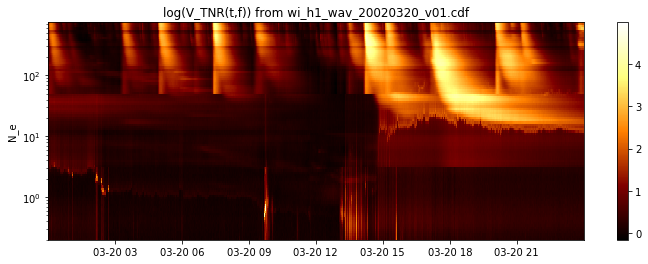

In [8]:
fig = plt.figure(figsize=(12,4))
plt.pcolormesh(h1_epoch,h1_n_e_TNR,np.log(h1_volt_TNR.T),cmap='afmhot')
plt.colorbar()
plt.semilogy()
plt.ylabel('N_e')
plt.title(f'log(V_TNR(t,f)) from {h1_wav_filename}')
plt.savefig(f'figures/h1_raw_{date}.png',dpi=200);

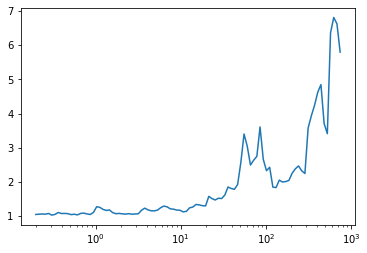

In [9]:
i_t = 400
plt.semilogx(h1_n_e_TNR,h1_volt_TNR[400])

In [10]:
spec = h1_volt_TNR[600]
i_list = []
for i in range(2,len(spec)-5):
    if spec[i]>spec[i-1] and spec[i]>spec[i-2]+0.2 and spec[i]>spec[i+1] and spec[i+1]>spec[i+2] and spec[i+2]>spec[i+3]:
        i_list.append(i)

In [11]:
i_list
for i_peak in i_list:
    print(h1_n_e_TNR[i_peak])
    # 但我后来发现这个不是太好，要i_peak - 1才好

[12, 76, 87]

0.5620143
143.8837
373.1832


In [12]:
print(len(spec))
print(len(np.diff(spec)))
diff_spec = np.diff(spec)

96
95


In [13]:
i_list = []
for i in range(1,len(diff_spec)-4):
    if diff_spec[i]>0 and diff_spec[i+1]<0 and diff_spec[i+2]<0 and diff_spec[i+3]<0 and spec[i+1]>spec[i-1]+0.2:
        i_list.append(i+1)
print(i_list)

[12, 76, 87]


In [14]:
h1_n_e_TNR[10:13]

array([0.4726438, 0.5154017, 0.5620143], dtype=float32)

In [15]:
ne_list = np.zeros(h1_volt_TNR.shape[0])
for i_t in range(h1_volt_TNR.shape[0]):
    spec = h1_volt_TNR[i_t]
    diff_spec = np.diff(spec)
    j_peak_list = []
    for i in range(1,len(diff_spec)-4):
        if diff_spec[i]>0 and diff_spec[i+1]<0 and diff_spec[i+2]<0 and diff_spec[i+3]<0 and diff_spec[i+4]<0 and spec[i+1]>spec[i-1]+0.046:
            j_peak_list.append(i+1)
    if j_peak_list:
        ne_list[i_t] = h1_n_e_TNR[j_peak_list[0]-1]

(0, 5)

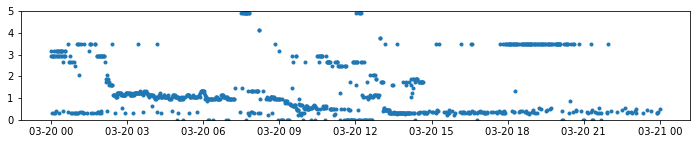

In [16]:
fig = plt.figure(figsize=(12,2))
plt.plot(h1_epoch,ne_list,'.')
plt.ylim([0,5])

/Users/linrong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


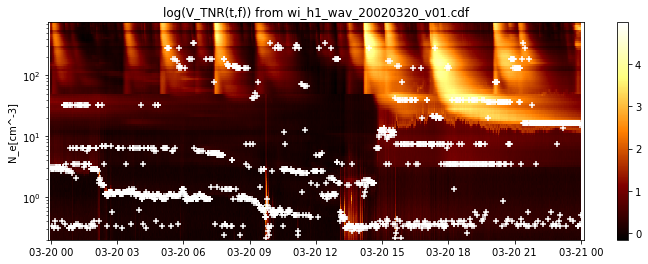

In [17]:
fig = plt.figure(figsize=(12,4))
plt.pcolormesh(h1_epoch,h1_n_e_TNR,np.log(h1_volt_TNR.T),cmap='afmhot')
plt.colorbar()
plt.semilogy()
plt.ylabel('N_e[cm^-3]')
plt.title(f'log(V_TNR(t,f)) from {h1_wav_filename}')
plt.scatter(h1_epoch,ne_list,color='white',marker='+')
# plt.ylim([0,12])
plt.savefig(f'figures/h1_with_QTN_result_{date}.png',dpi=200);

In [18]:
normalized_volt_TNR = h1_volt_TNR.T
normalized_volt_TNR = normalized_volt_TNR / normalized_volt_TNR.sum(axis=0)
print(normalized_volt_TNR.shape)

(96, 1440)


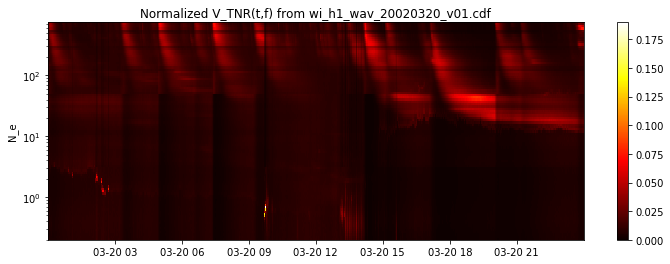

In [19]:
fig = plt.figure(figsize=(12,4))
plt.pcolormesh(h1_epoch,h1_n_e_TNR,normalized_volt_TNR,cmap='hot')
plt.colorbar()
plt.semilogy()
plt.ylabel('N_e')
plt.title(f'Normalized V_TNR(t,f) from {h1_wav_filename}')
plt.savefig(f'figures/h1_normalized_{date}.png',dpi=200);

In [20]:
h0_data = pycdf.CDF(h0_wav_filename)
# h0_data

In [21]:
h0_epoch = h0_data['Epoch']
h0_Ne = h0_data['Ne']
h0_Ne_Quality = h0_data['Ne_Quality']
print(h0_epoch[:10])
print(np.diff(h0_epoch)[:10])

[datetime.datetime(2002, 3, 20, 0, 0, 58, 476000)
 datetime.datetime(2002, 3, 20, 0, 1, 16, 140000)
 datetime.datetime(2002, 3, 20, 0, 2, 44, 460000)
 datetime.datetime(2002, 3, 20, 0, 3, 2, 124000)
 datetime.datetime(2002, 3, 20, 0, 3, 19, 788000)
 datetime.datetime(2002, 3, 20, 0, 3, 37, 452000)
 datetime.datetime(2002, 3, 20, 0, 3, 55, 116000)
 datetime.datetime(2002, 3, 20, 0, 4, 12, 780000)
 datetime.datetime(2002, 3, 20, 0, 4, 30, 444000)
 datetime.datetime(2002, 3, 20, 0, 4, 48, 108000)]
[datetime.timedelta(0, 17, 664000) datetime.timedelta(0, 88, 320000)
 datetime.timedelta(0, 17, 664000) datetime.timedelta(0, 17, 664000)
 datetime.timedelta(0, 17, 664000) datetime.timedelta(0, 17, 664000)
 datetime.timedelta(0, 17, 664000) datetime.timedelta(0, 17, 664000)
 datetime.timedelta(0, 17, 664000) datetime.timedelta(0, 17, 664000)]


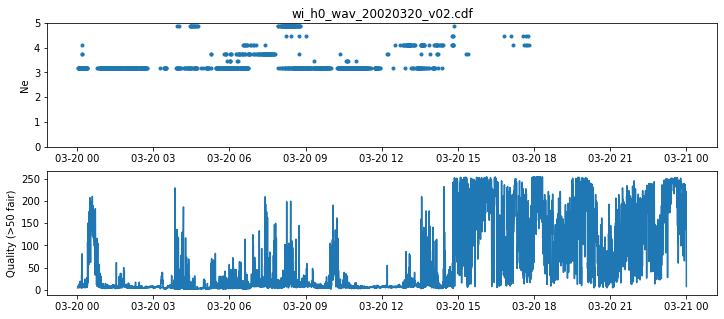

In [22]:
fig, axes = plt.subplots(2,figsize=(12,5))
ax = axes[0]
ax.plot(h0_epoch,h0_Ne,'.')
ax.set_ylim([0,5])
ax.set_ylabel('Ne')
ax.set_title(h0_wav_filename)
ax = axes[1]
ax.plot(h0_epoch,h0_Ne_Quality)
ax.set_ylabel('Quality (>50 fair)')
plt.savefig(f'figures/h0_{date}.png',dpi=200);

In [23]:
k0_data = pycdf.CDF(k0_wav_filename)
# k0_data

In [24]:
k0_epoch = k0_data['Epoch']
k0_Ne = k0_data['Ne']
k0_Ne_Quality = k0_data['Ne_Quality']
print(k0_epoch[:10])
print(np.diff(k0_epoch)[:10])

[datetime.datetime(2002, 3, 20, 0, 1, 30)
 datetime.datetime(2002, 3, 20, 0, 4, 30)
 datetime.datetime(2002, 3, 20, 0, 7, 30)
 datetime.datetime(2002, 3, 20, 0, 10, 30)
 datetime.datetime(2002, 3, 20, 0, 13, 30)
 datetime.datetime(2002, 3, 20, 0, 16, 30)
 datetime.datetime(2002, 3, 20, 0, 19, 30)
 datetime.datetime(2002, 3, 20, 0, 22, 30)
 datetime.datetime(2002, 3, 20, 0, 25, 30)
 datetime.datetime(2002, 3, 20, 0, 28, 30)]
[datetime.timedelta(0, 180) datetime.timedelta(0, 180)
 datetime.timedelta(0, 180) datetime.timedelta(0, 180)
 datetime.timedelta(0, 180) datetime.timedelta(0, 180)
 datetime.timedelta(0, 180) datetime.timedelta(0, 180)
 datetime.timedelta(0, 180) datetime.timedelta(0, 180)]


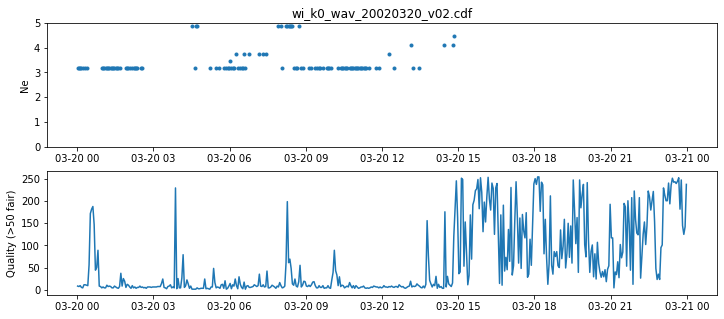

In [25]:
fig, axes = plt.subplots(2,figsize=(12,5))
ax = axes[0]
ax.plot(k0_epoch,k0_Ne,'.')
ax.set_ylim([0,5])
ax.set_title(k0_wav_filename)
ax.set_ylabel('Ne')
ax = axes[1]
ax.plot(k0_epoch,k0_Ne_Quality)
ax.set_ylabel('Quality (>50 fair)')
plt.savefig(f'figures/k0_{date}.png',dpi=200);